<a href="https://colab.research.google.com/github/ambroz72/Data-Analytics---BSBI/blob/master/Crypto_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [2]:
df=pd.read_csv('Bitcoin.csv')

In [3]:
# Display first few rows
print(df.head())

         Date          Open          High           Low         Close  \
0  2019-06-18   9128.269531   9149.763672   8988.606445   9062.045898   
1  2019-06-19   9068.174805   9277.677734   9051.094727   9271.459961   
2  2019-06-20   9271.567383   9573.689453   9209.416992   9519.200195   
3  2019-06-21   9526.833984  10130.935547   9526.833984  10127.998047   
4  2019-06-22  10151.890625  11171.013672  10083.189453  10719.981445   

     Volume Currency  
0  952850.0      USD  
1  131077.0      USD  
2   83052.0      USD  
3   76227.0      USD  
4   84485.0      USD  


In [4]:
# Data Exploration
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1151 entries, 0 to 1150
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1151 non-null   object 
 1   Open      1151 non-null   float64
 2   High      1151 non-null   float64
 3   Low       1151 non-null   float64
 4   Close     1151 non-null   float64
 5   Volume    1151 non-null   float64
 6   Currency  1151 non-null   object 
dtypes: float64(5), object(2)
memory usage: 63.1+ KB
None
               Open          High           Low         Close        Volume
count   1151.000000   1151.000000   1151.000000   1151.000000  1.151000e+03
mean   26488.652992  27528.416710  25416.606967  26496.733082  2.874051e+07
std    17963.101635  18432.925246  17484.604545  17952.113609  5.202999e+07
min     4943.832520   5338.512695      0.076853   4936.755371  0.000000e+00
25%     9706.758301  10090.012695   9360.636230   9712.636719  7.495500e+03
50%    20873.337891  21867.82

In [5]:
# Check for missing values
print(df.isnull().sum())

Date        0
Open        0
High        0
Low         0
Close       0
Volume      0
Currency    0
dtype: int64


In [6]:
# Fill missing values with mean
# df.fillna(df.mean(), inplace=True)

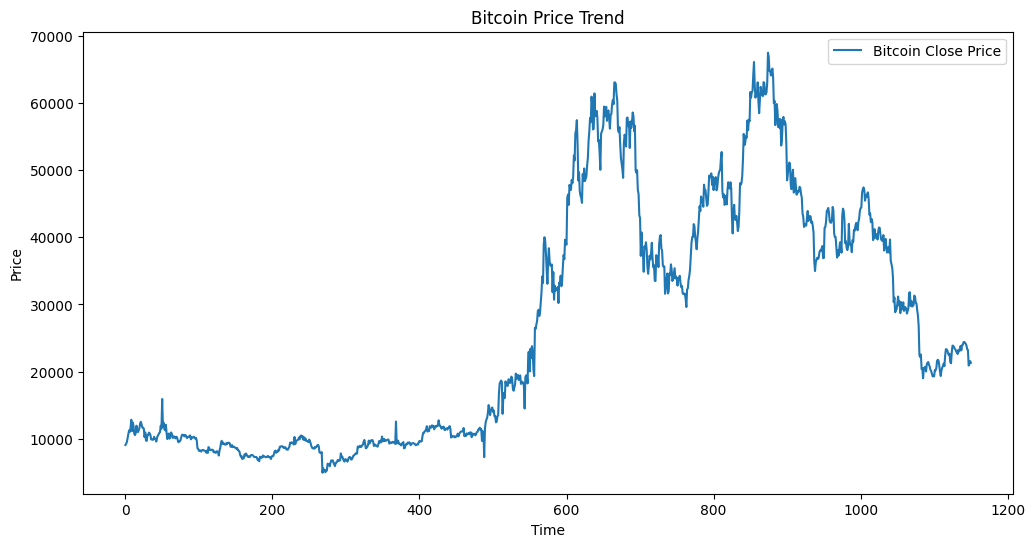

In [7]:
# Visualizing price trends
plt.figure(figsize=(12, 6))
sns.lineplot(x=df.index, y=df['Close'], label='Bitcoin Close Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Bitcoin Price Trend')
plt.legend()
plt.show()


In [8]:
# Feature Engineering: Creating new features
df['Price_Change'] = df['Close'].diff()
df['Rolling_Mean'] = df['Close'].rolling(window=5).mean()
df.dropna(inplace=True)

In [9]:
# Feature Selection
target = 'Close'
features = ['Open', 'High', 'Low', 'Volume', 'Price_Change', 'Rolling_Mean']

X = df[features]
y = df[target]


In [10]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [13]:
# Train Models
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Linear Regression": LinearRegression(),
    "KNN": KNeighborsRegressor(n_neighbors=5)
}

results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    results[name] = rmse
    print(f"{name} RMSE: {rmse:.4f}")


Random Forest RMSE: 742.3001
Linear Regression RMSE: 129.8239
KNN RMSE: 1084.0122


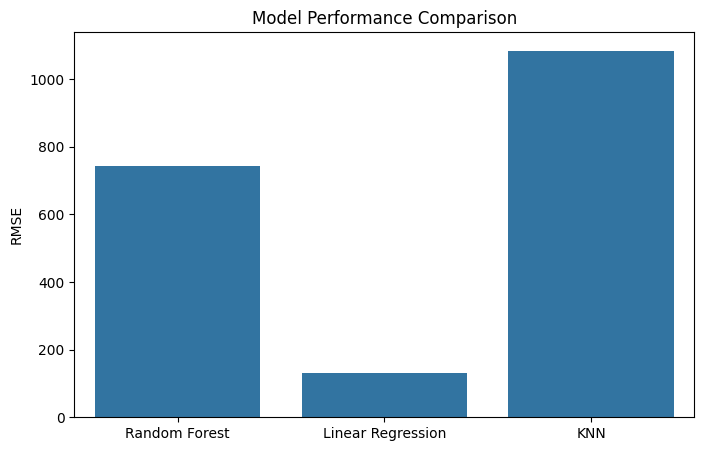

In [14]:
# Compare Model Performance
plt.figure(figsize=(8, 5))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.ylabel('RMSE')
plt.title('Model Performance Comparison')
plt.show()